In [92]:
import sqlite3
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import numpy 
city_cube  = 'C_urban_cube_sh.sqlite'

## Get the population Table

In [93]:
# get Eurostat number of population data
con = sqlite3.connect(city_cube)
# read full table
population_all = pd.read_sql_query("SELECT * FROM c_urban_cube_eurostat", con)

## Code significance  
indic_code (type of data): e.g., DE1001V = total population (see: https://www.espon.eu/sites/default/files/attachments/CB02_Inception_report_Annex_I.pdf) 

City name from urau_code, here: https://ec.europa.eu/eurostat/documents/3217494/5729233/RY_CH_ANNEXES_2011-EN.PDF.pdf/deb1dbbc-e8d3-4dd2-aa76-fae2f36a0bd9?t=1414776025000 

In [99]:
population_all.head()

,index,indic_code,urau_code,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,EN1002V,AT001C,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,EN1002V,AT002C,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,EN1002V,AT003C,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,EN1002V,AT004C,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,EN1002V,AT005C,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
print('Features: ', population_all.indic_code.unique())
print('Number of Features: ', len(population_all.indic_code.unique()))

Features:  ['EN1002V' 'EN1003V' 'EN1004V' 'EN1005V' 'EN2002V' 'EN2003V' 'EN2005V'
 'EN2025V' 'EN2026V' 'EN2027V' 'EN3003V' 'EN3010V' 'EN3011V' 'EN4008V'
 'EN3012V' 'EN3013V' 'EN5200V' 'EN5201V' 'EN5202V' 'EN5203V' 'EN5204V'
 'EN5205V' 'EN5206V' 'EN5207V' 'SA2013V' 'SA2016V' 'SA2019V' 'EC3066V'
 'EC3067V' 'EC3039V' 'EC3040V' 'EC3064V' 'EC3065V' 'SA1001V' 'SA1025V'
 'SA1052V' 'SA1053V' 'SA3005V' 'EC1002V' 'EC1010V' 'EC1145V' 'EC1174V'
 'EC1177V' 'EC1180V' 'DE1001V' 'DE1025V' 'DE1028V' 'DE1040V' 'DE1046V'
 'DE1049V' 'DE1055V' 'DE1058V' 'DE1061V' 'DE1064V' 'DE1074V' 'DE1077V'
 'DE1101V' 'DE1104V' 'DE1107V' 'DE1110V' 'DE1113V' 'DE1116V' 'DE1119V'
 'DE1122V' 'DE1125V' 'DE1128V' 'DE1131V' 'DE1134V' 'DE1137V' 'DE1073V'
 'CR1015V' 'TT1007V' 'TT1008V' 'TT1010V' 'TT1012V' 'TT1079V' 'TT1019V'
 'TT1020V' 'TT1060V' 'TT1064V' 'TT1065V' 'TT1080V']
Number of Features:  82


## Keep only the total population per year

In [101]:
population_sum = population_all[population_all['indic_code'] == 'DE1001V']
population_sum = population_sum.reset_index(drop=True)
population_sum.to_csv('TotalPopulation.csv', index=False)

## Cities (countries) with full data

In [102]:
nonnan = population_sum
for col in nonnan.columns:
    nonnan = nonnan[~pd.isnull(nonnan[col])]

In [104]:
nonnan.head()

,index,indic_code,urau_code,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
7,7,DE1001V,BE,9986975.0,10021997.0,10068319.0,10100631.0,10130574.0,10143047.0,10170226.0,...,11094850.0,11161642.0,11203992.0,11258434.0,11307192.0,11351727.0,11398589.0,11455519.0,11522440.0,11554767.0
8,8,DE1001V,BE001C,954045.0,951217.0,950339.0,949070.0,951580.0,948122.0,950597.0,...,1159448.0,1174624.0,1183841.0,1196831.0,1201129.0,1199095.0,1205492.0,1215289.0,1223364.0,1226329.0
9,9,DE1001V,BE002C,467518.0,465783.0,465102.0,462880.0,459072.0,455852.0,453030.0,...,507368.0,512230.0,513915.0,515593.0,517731.0,520859.0,523591.0,526439.0,530014.0,530627.0
10,10,DE1001V,BE003C,230246.0,230232.0,229821.0,228490.0,227483.0,226464.0,225469.0,...,249205.0,249754.0,251984.0,253914.0,257226.0,259462.0,260329.0,262205.0,263687.0,264019.0
11,11,DE1001V,BE004C,206214.0,206903.0,207045.0,206898.0,206491.0,205591.0,204899.0,...,204762.0,204826.0,203640.0,203228.0,202602.0,201884.0,202341.0,202637.0,203314.0,238412.0


## Save

In [105]:
nonnan = nonnan.reset_index(drop=True)
nonnan.to_csv('CompleteData.csv', index=False)

## Plot existing cities (countries)

In [117]:
lis = []
for index, row in nonnan.iterrows():
    arr = numpy.asarray(row)
    arr = numpy.delete(arr, [0, 1, 2])
    arr = arr.astype(float)
    lis.append(arr)

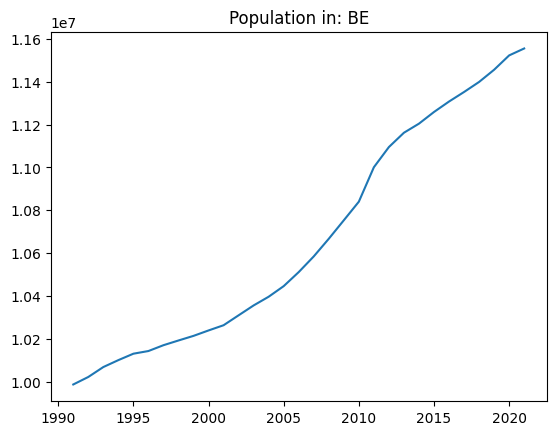

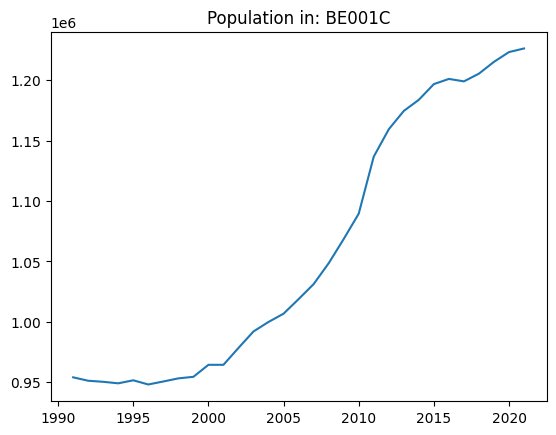

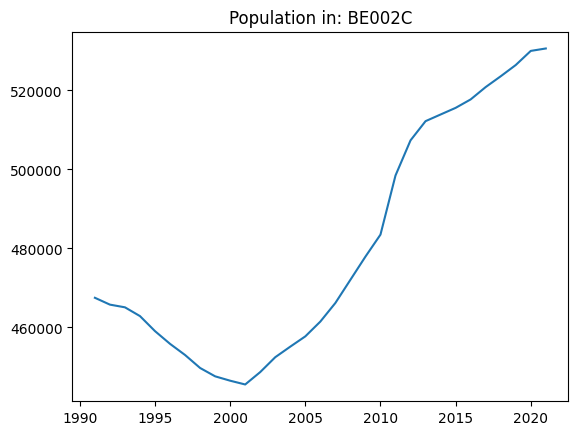

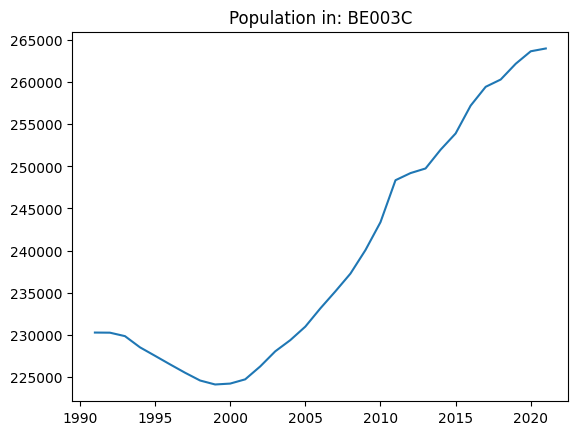

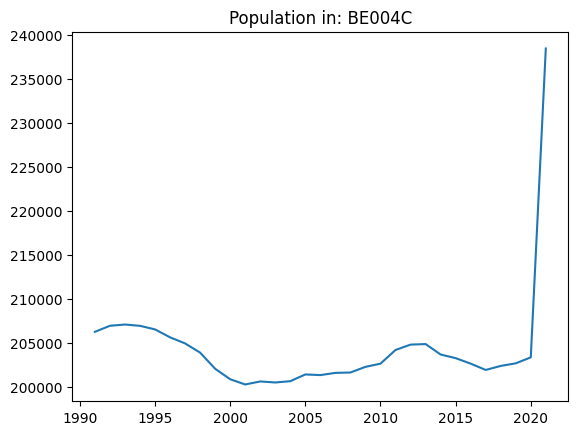

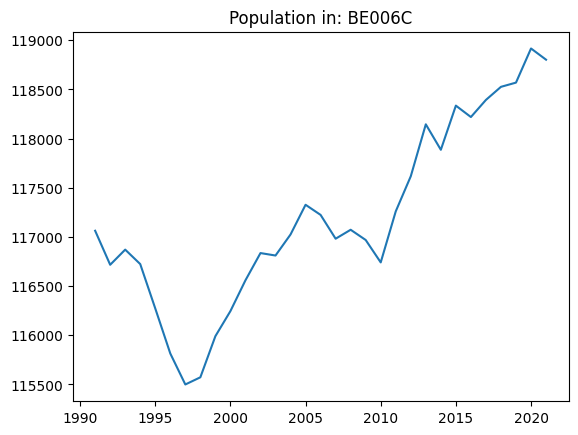

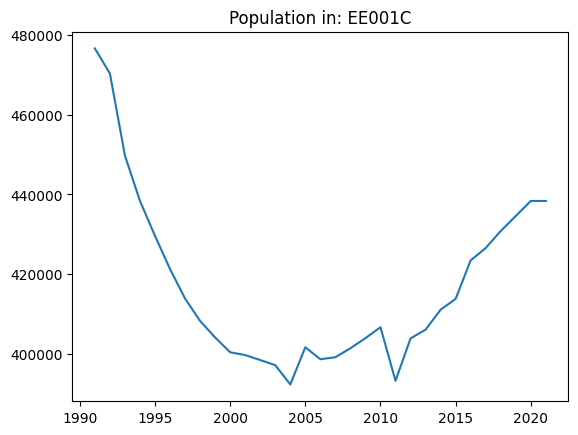

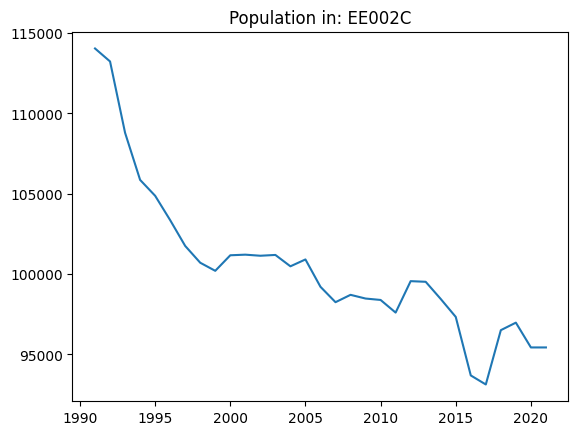

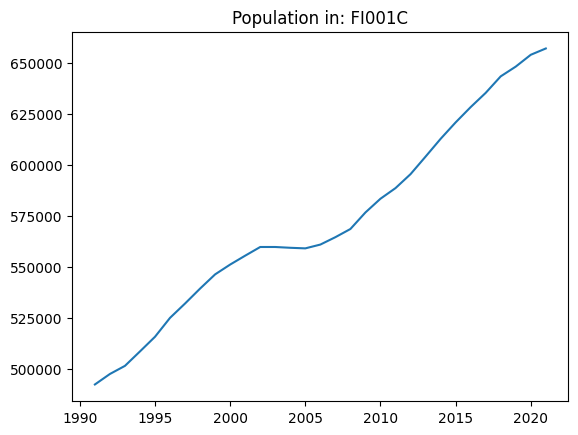

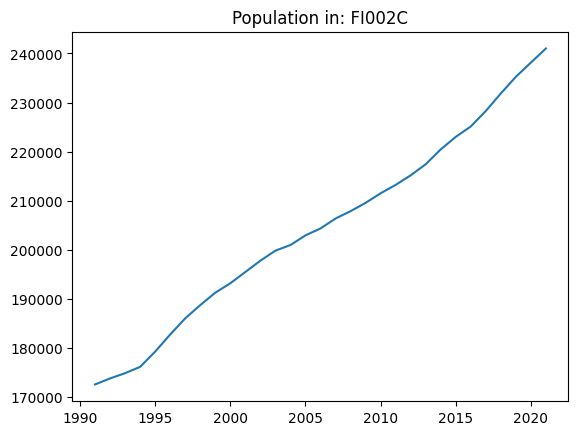

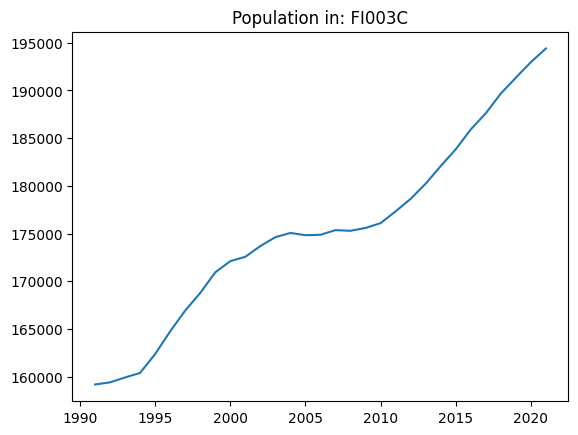

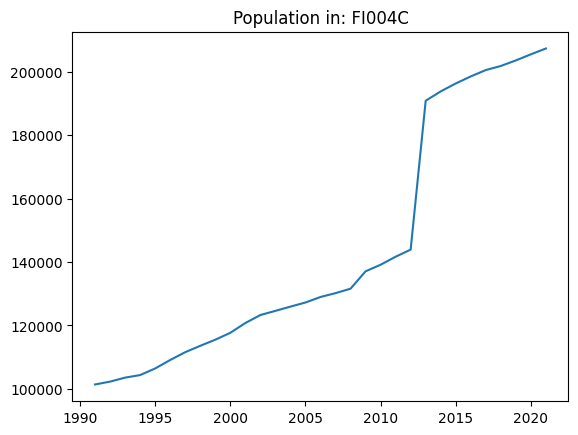

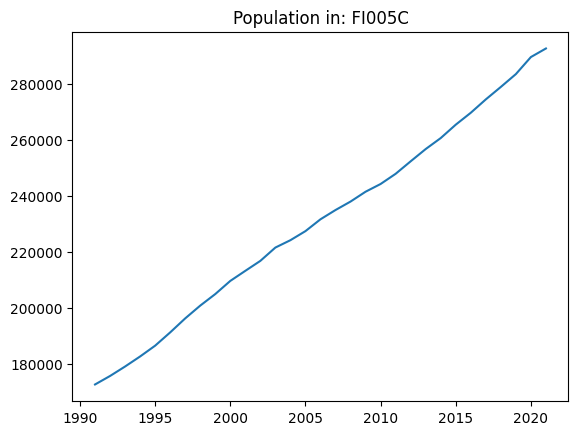

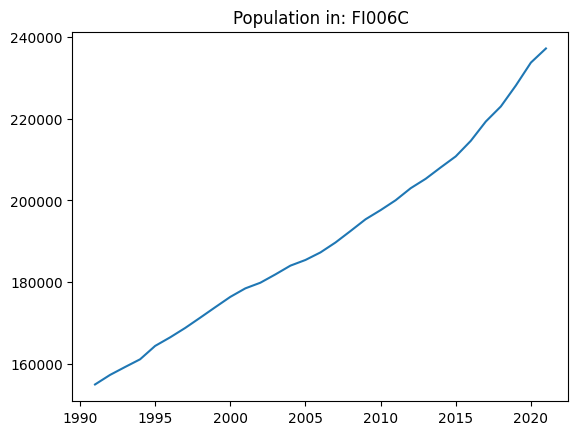

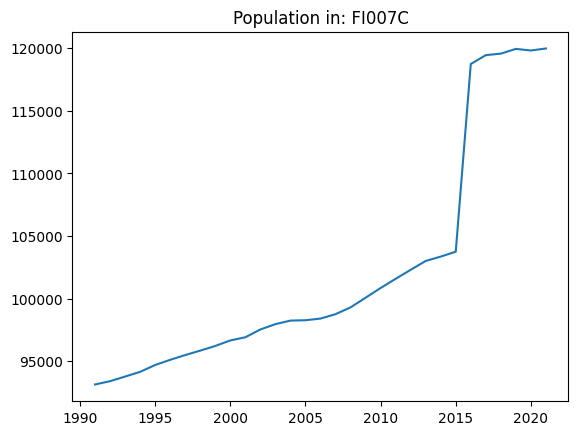

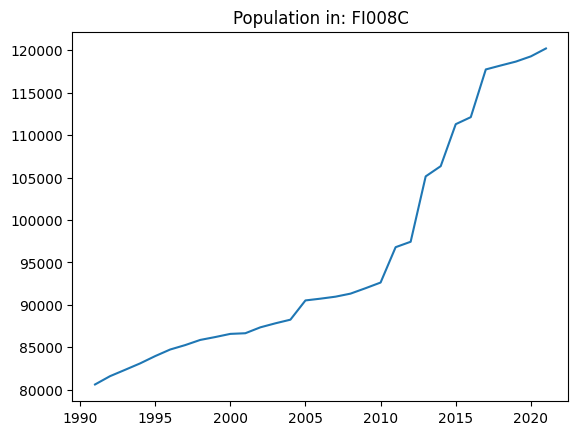

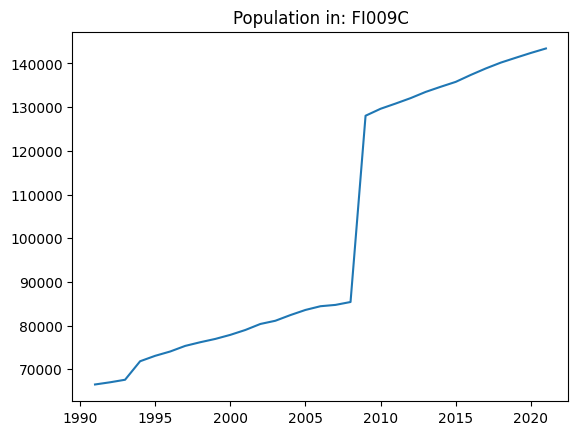

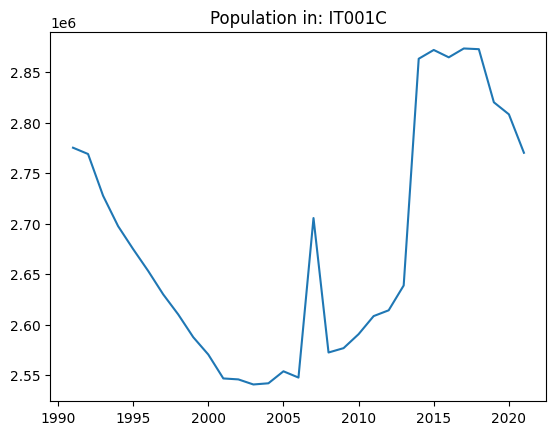

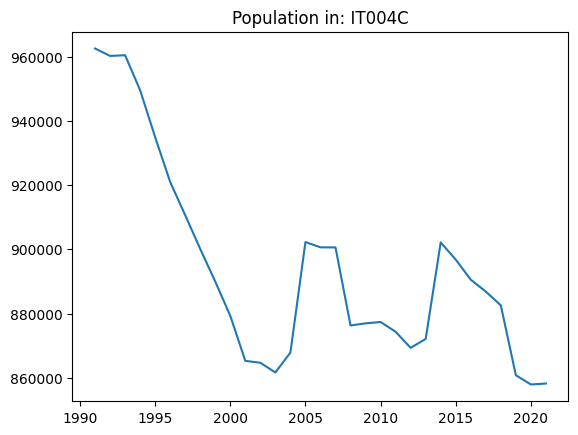

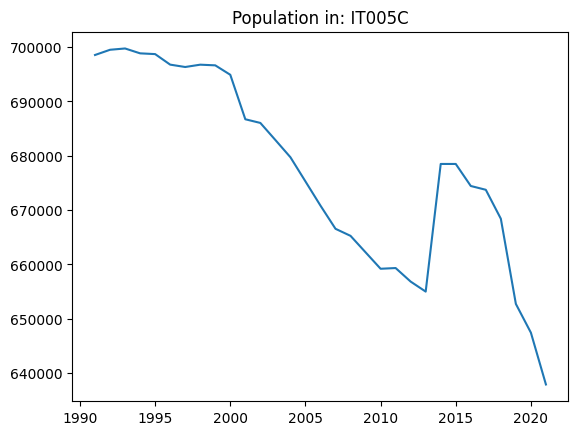

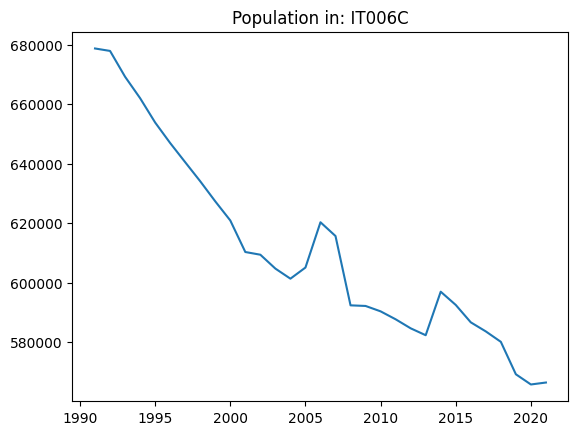

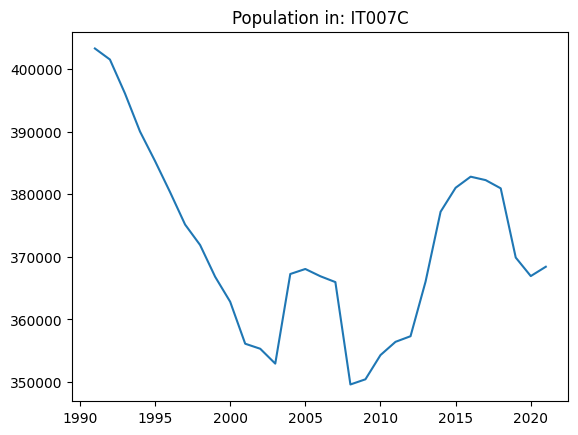

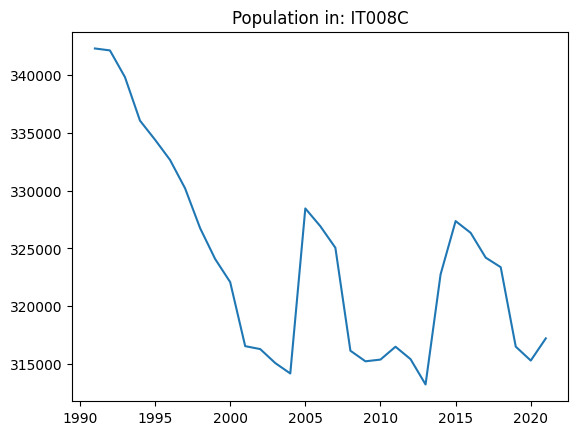

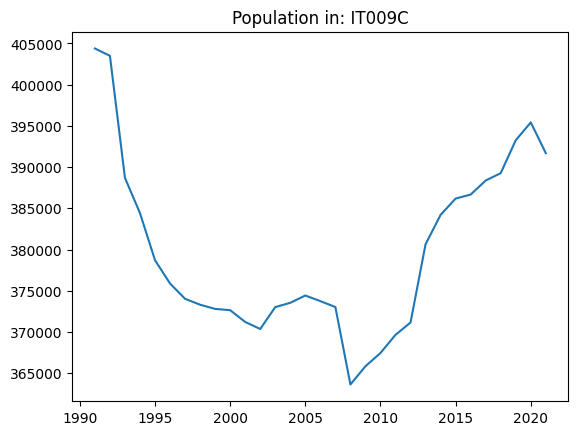

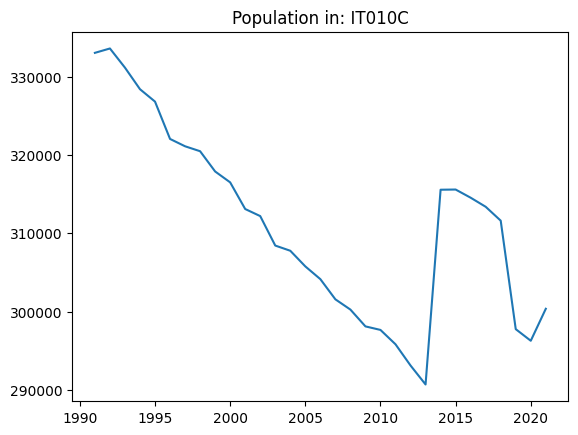

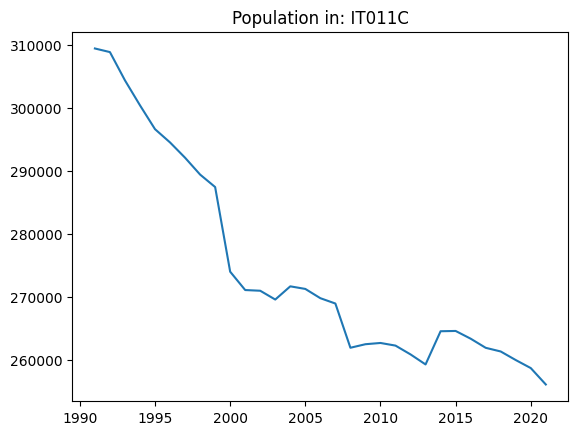

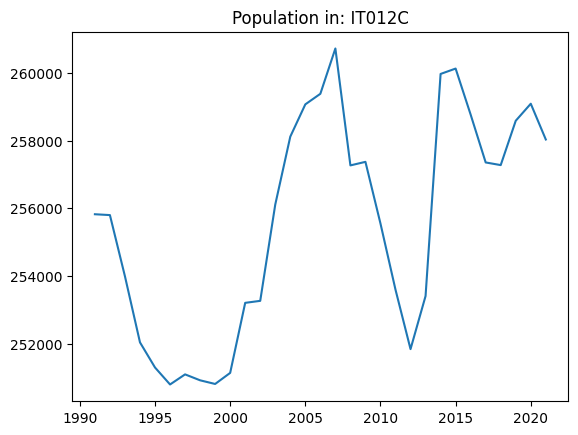

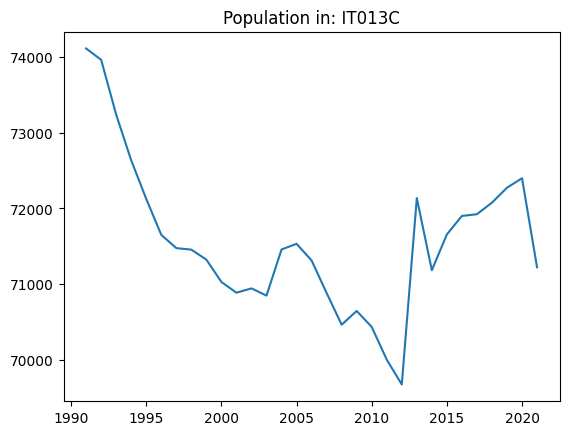

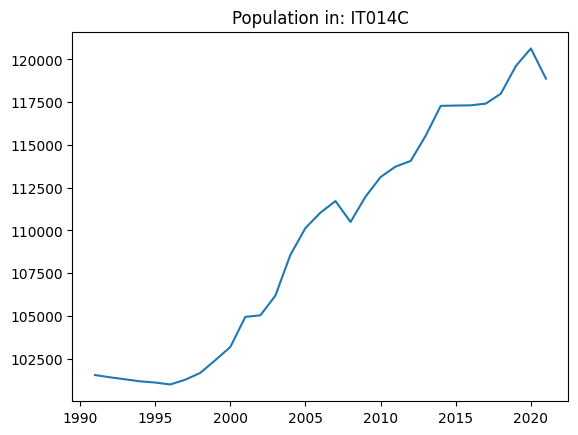

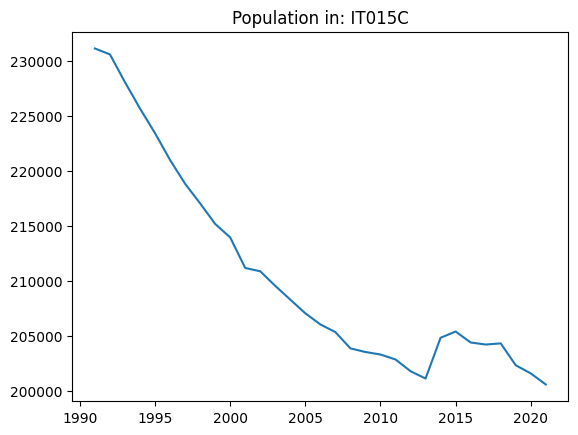

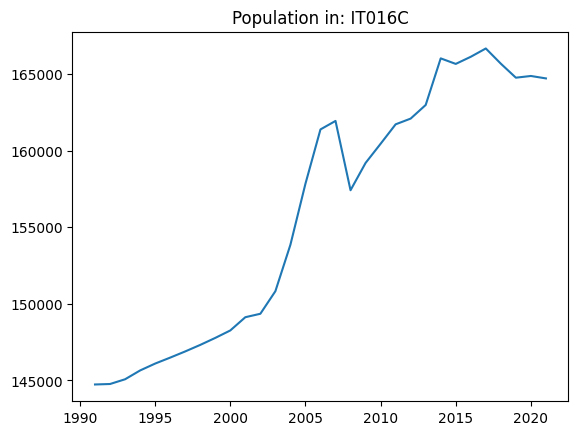

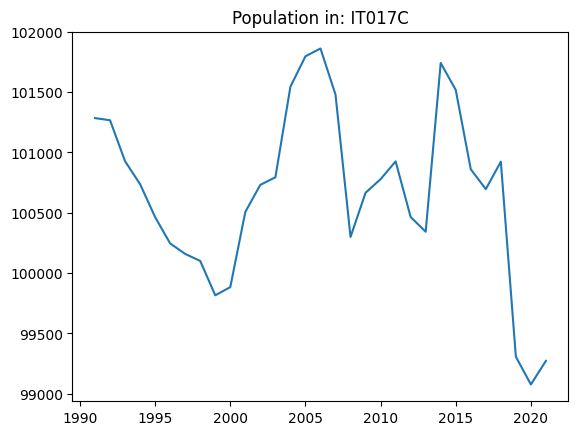

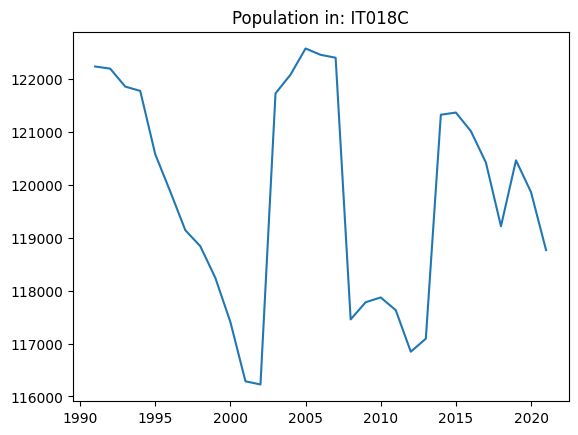

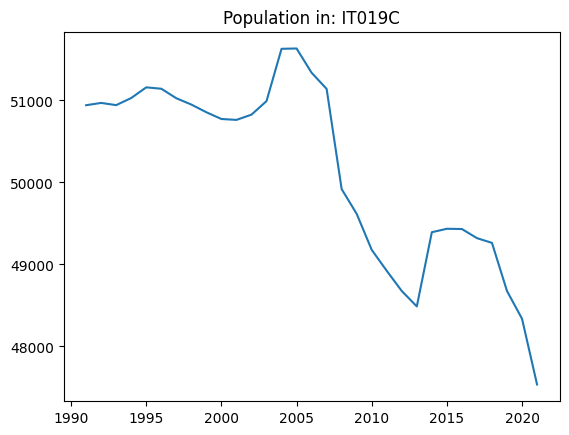

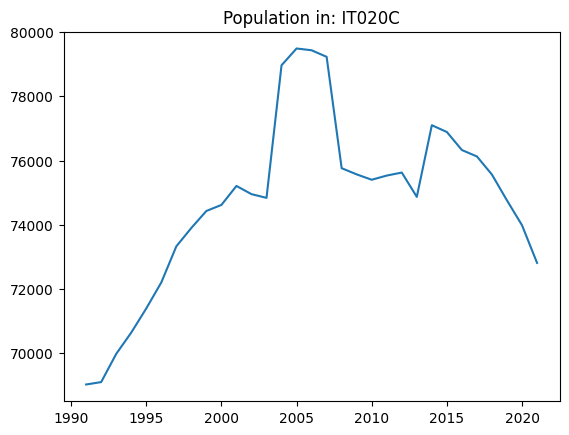

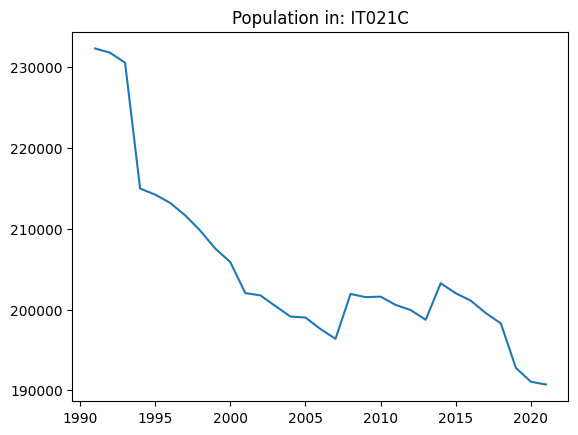

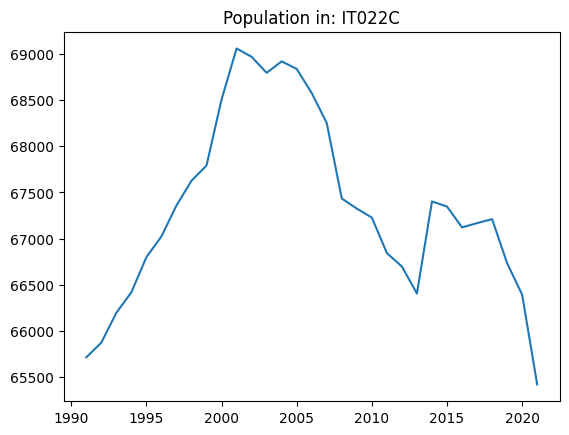

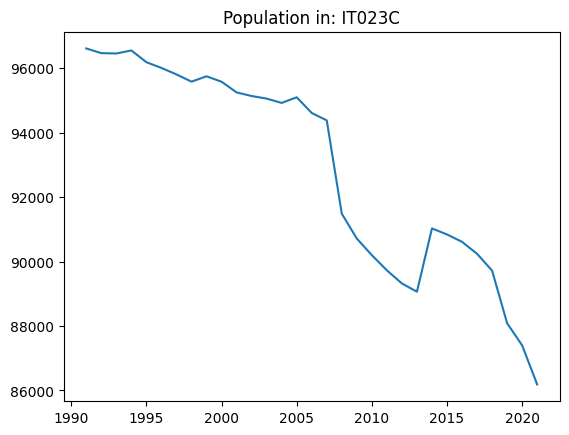

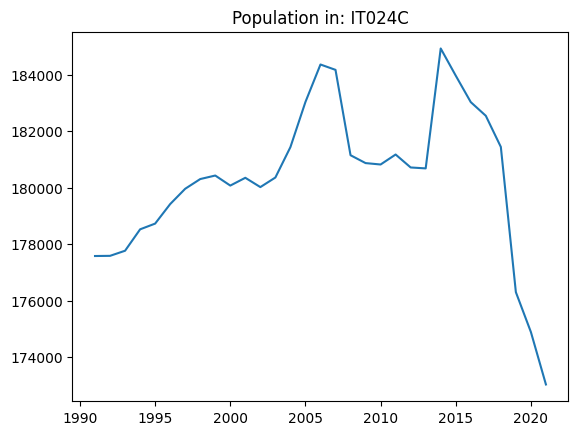

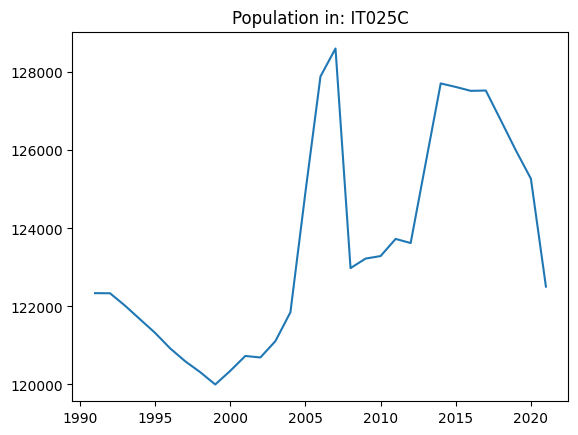

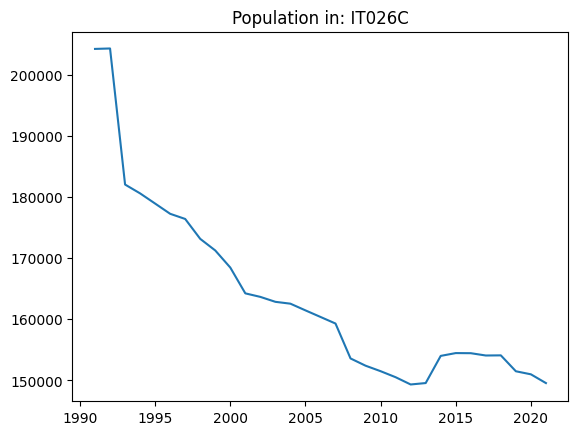

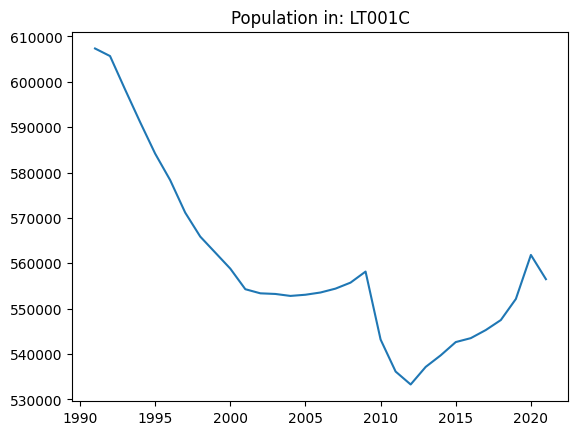

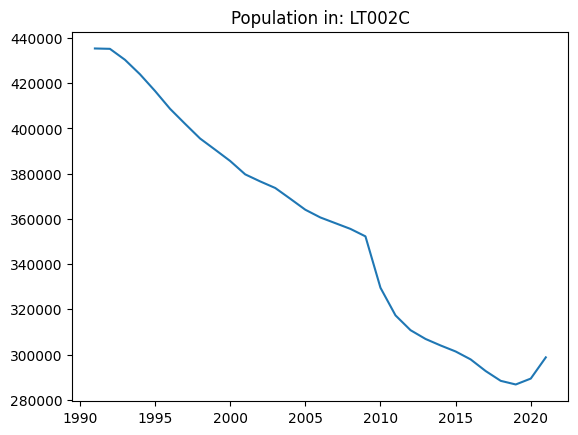

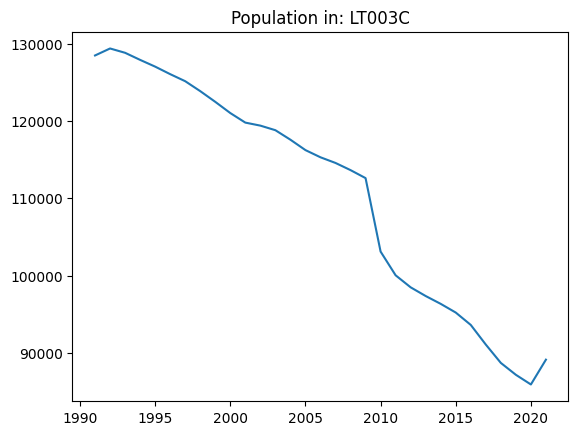

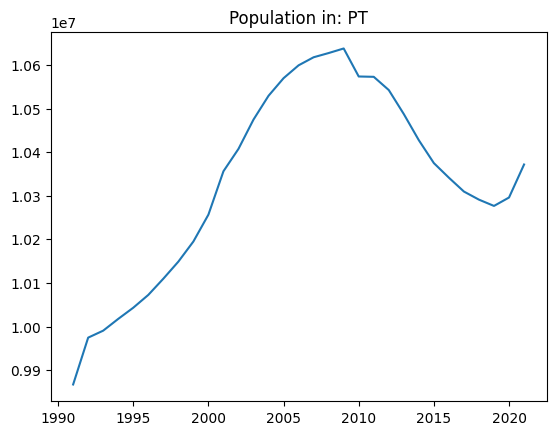

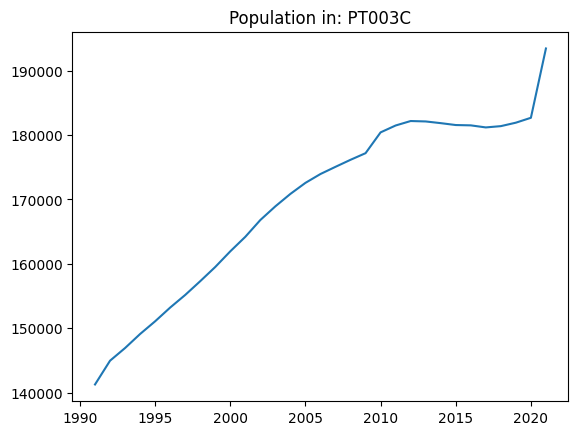

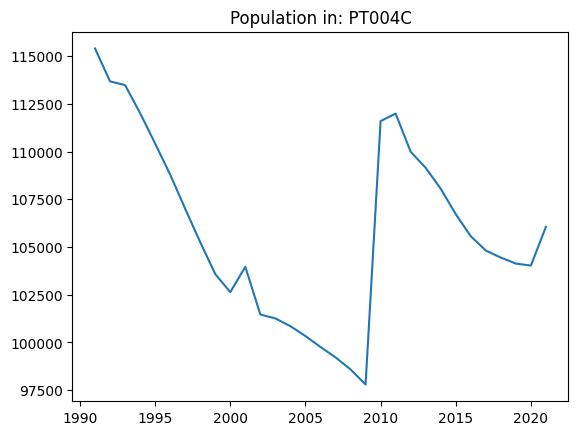

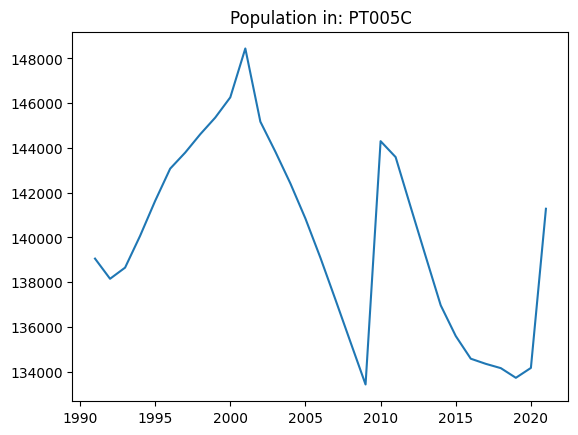

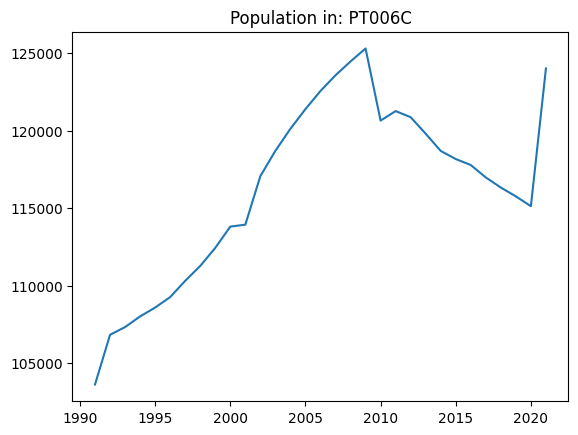

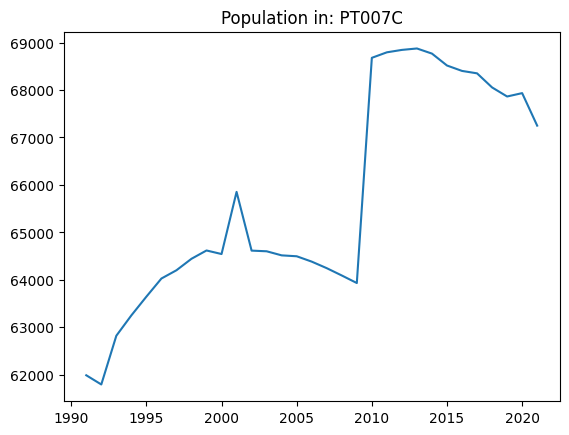

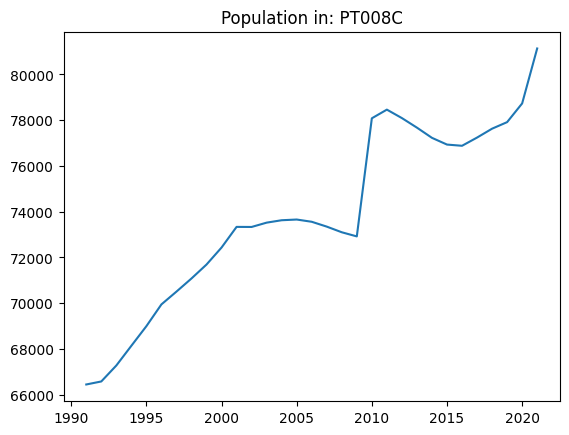

In [143]:
x = range(1991, 2022)
i = 0
for arr in lis:
    plt.plot(x, arr)
    plt.title("Population in: " + nonnan.urau_code.iloc[i])
    plt.savefig("Plots/" + nonnan.urau_code.iloc[i]+ ".png")
    plt.show()
    i = i + 1

## Cities with nan data (for all years)

In [119]:
nans = population_sum
for col in nans.columns:
    nans = nans[pd.isnull(nans[col])]
nans

,index,indic_code,urau_code,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021


## Distribution of data x: City indice; y: number of years with available data

In [122]:
available = []
for index, row in population_sum.iterrows():
    arr = numpy.asarray(row)
    arr = numpy.delete(arr, [0, 1, 2])
    arr.astype(float)
    i = 0
    for v in arr:
        if(not pd.isnull(v)):
            i = i + 1
    available.append(i)

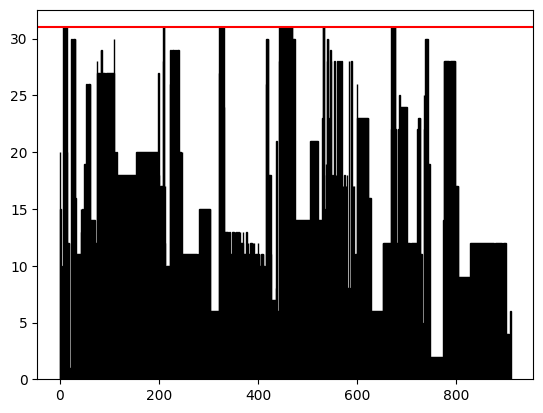

In [142]:
a = range(1, len(population_sum)+1)
plt.bar(a, available, align='center', width=1, edgecolor='black')
plt.axhline(y = 31, color = 'r', linestyle = '-')
plt.show()

## Statistics:

In [163]:
array = numpy.asarray(available)
print("Number of cities\countries: ", len(population_sum))
print("Number of cities\countries with complete data: ", len(nonnan))
print("Number of cities\countries with no data: ", len(nans))
print("Maximum number of available years: ", array.max())
print("Minimum number of available years: ", array.min())
print("Average number of available years: ", array.mean())
print("Standard deviation: ", array.std())
print("Missing values: (", population_sum.isna().sum().sum(), " missing from ", population_sum.drop(columns=['index', 'indic_code', 'urau_code']).size, ") = ", 100*population_sum.isna().sum().sum()/population_sum.drop(columns=['index', 'indic_code', 'urau_code']).size, "%")

Number of cities\countries:  909
Number of cities\countries with complete data:  51
Number of cities\countries with no data:  0
Maximum number of available years:  31
Minimum number of available years:  1
Average number of available years:  16.016501650165015
Standard deviation:  8.007886134730374
Missing values: ( 13620  missing from  28179 ) =  48.33386564462898 %


## Distribution

In [136]:
unique_values, frequencies = numpy.unique(array, return_counts=True)

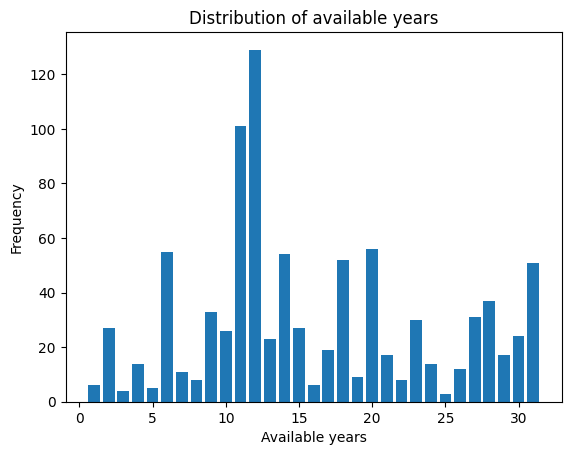

In [140]:
plt.bar(unique_values, frequencies)
plt.xlabel("Available years")
plt.ylabel("Frequency")
plt.title("Distribution of available years")
plt.savefig("Plots/Distribution.png")
plt.show()

## Missing data for each feature

In [162]:
for i in population_all.indic_code.unique():
    data = population_all[population_all['indic_code'] == i]
    data = data.reset_index(drop=True)
    data.to_csv(i + '.csv', index=False)
    print(i, ": Missing data: (", data.isna().sum().sum(), " missing from ", data.drop(columns=['index', 'indic_code', 'urau_code']).size,") = ", 100*data.isna().sum().sum()/(len(data)*31), "%")

EN1002V : Missing data: ( 11170  missing from  12896 ) =  86.61600496277916 %
EN1003V : Missing data: ( 11958  missing from  13950 ) =  85.72043010752688 %
EN1004V : Missing data: ( 12076  missing from  14074 ) =  85.80360949268155 %
EN1005V : Missing data: ( 11978  missing from  13981 ) =  85.67341391888992 %
EN2002V : Missing data: ( 9400  missing from  14849 ) =  63.30392619031585 %
EN2003V : Missing data: ( 9226  missing from  14818 ) =  62.2621136455662 %
EN2005V : Missing data: ( 11291  missing from  15779 ) =  71.55713289815577 %
EN2025V : Missing data: ( 8319  missing from  13578 ) =  61.268228015908086 %
EN2026V : Missing data: ( 9635  missing from  15407 ) =  62.536509378853765 %
EN2027V : Missing data: ( 10218  missing from  14632 ) =  69.8332422088573 %
EN3003V : Missing data: ( 13669  missing from  16585 ) =  82.41784745251734 %
EN3010V : Missing data: ( 14063  missing from  16368 ) =  85.91764418377322 %
EN3011V : Missing data: ( 8429  missing from  10013 ) =  84.18056526